In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [20]:
df = pd.read_csv(r'Assets\ncr_ride_bookings.csv')

In [21]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [22]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [24]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [25]:
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [28]:
df.shape

(150000, 21)

In [29]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

## Visualizations

In [30]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

* Time-Series: Total Rides & Revenue Over Time

In [31]:
daily_stats = df.groupby('Date').agg({'Booking ID':'count', 'Booking Value':'sum'}).reset_index()
daily_stats

,Date,Booking ID,Booking Value
0,2024-01-01,414,124057.0
1,2024-01-02,389,113427.0
2,2024-01-03,384,116982.0
3,2024-01-04,414,117045.0
4,2024-01-05,416,133692.0
...,...,...,...
360,2024-12-26,369,122357.0
361,2024-12-27,431,137012.0
362,2024-12-28,391,187391.0
363,2024-12-29,417,214951.0


C:\Users\RUN\AppData\Local\Temp\ipykernel_14328\1090192454.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = daily_stats.resample("M", on="Date").agg({


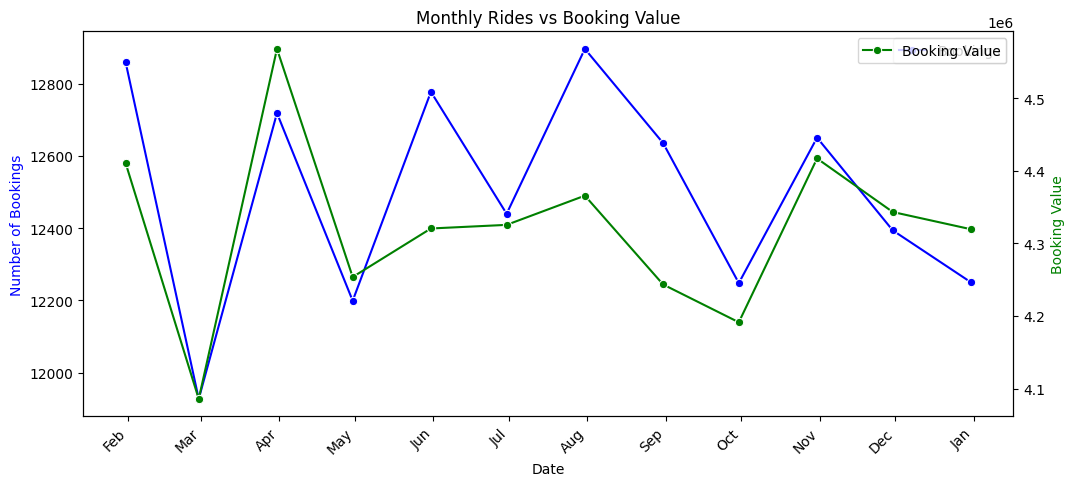

In [32]:
daily_stats["Date"] = pd.to_datetime(daily_stats["Date"])

# Monthly stats
monthly_stats = daily_stats.resample("M", on="Date").agg({
    "Booking ID": "sum",
    "Booking Value": "sum"
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12,5))
sns.lineplot(data=monthly_stats, x="Date", y="Booking ID", ax=ax1, color="blue", marker="o", label="Bookings")
ax1.set_ylabel("Number of Bookings", color="blue")

ax2 = ax1.twinx()
sns.lineplot(data=monthly_stats, x="Date", y="Booking Value", ax=ax2, color="green", marker="o", label="Booking Value")
ax2.set_ylabel("Booking Value", color="green")

ax1.set_title("Monthly Rides vs Booking Value")

# Format x-axis as months
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))  # Jan, Feb, Mar...
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
plt.show()

### Count Plots

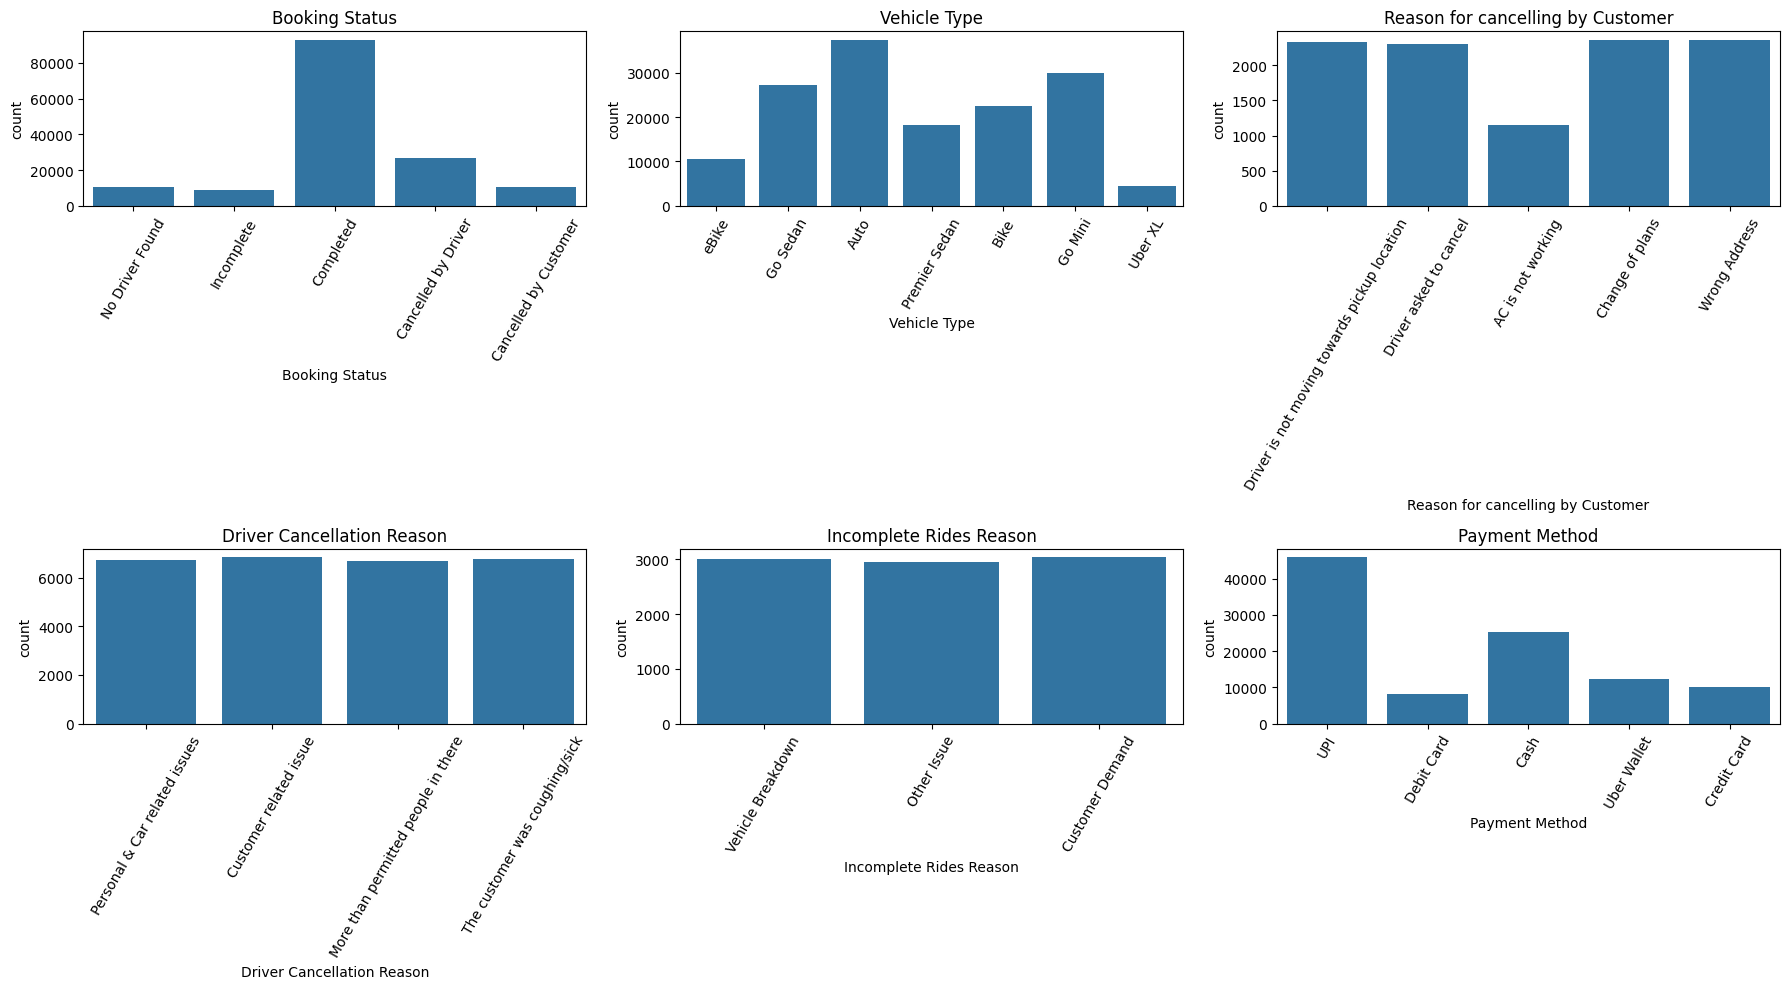

In [33]:
cols = ['Booking Status','Vehicle Type', 
        'Reason for cancelling by Customer', 
        'Driver Cancellation Reason', 
        'Incomplete Rides Reason', 
        'Payment Method']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()

Exact value counts

In [34]:
for col in cols:
    print(f'{col:_^50}')
    print(df[col].value_counts().sort_values())

__________________Booking Status__________________
Booking Status
Incomplete                9000
Cancelled by Customer    10500
No Driver Found          10500
Cancelled by Driver      27000
Completed                93000
Name: count, dtype: int64
___________________Vehicle Type___________________
Vehicle Type
Uber XL           4449
eBike            10557
Premier Sedan    18111
Bike             22517
Go Sedan         27141
Go Mini          29806
Auto             37419
Name: count, dtype: int64
________Reason for cancelling by Customer_________
Reason for cancelling by Customer
AC is not working                               1155
Driver asked to cancel                          2295
Driver is not moving towards pickup location    2335
Change of plans                                 2353
Wrong Address                                   2362
Name: count, dtype: int64
____________Driver Cancellation Reason____________
Driver Cancellation Reason
More than permitted people in there    6686
Pers

### Hist plots

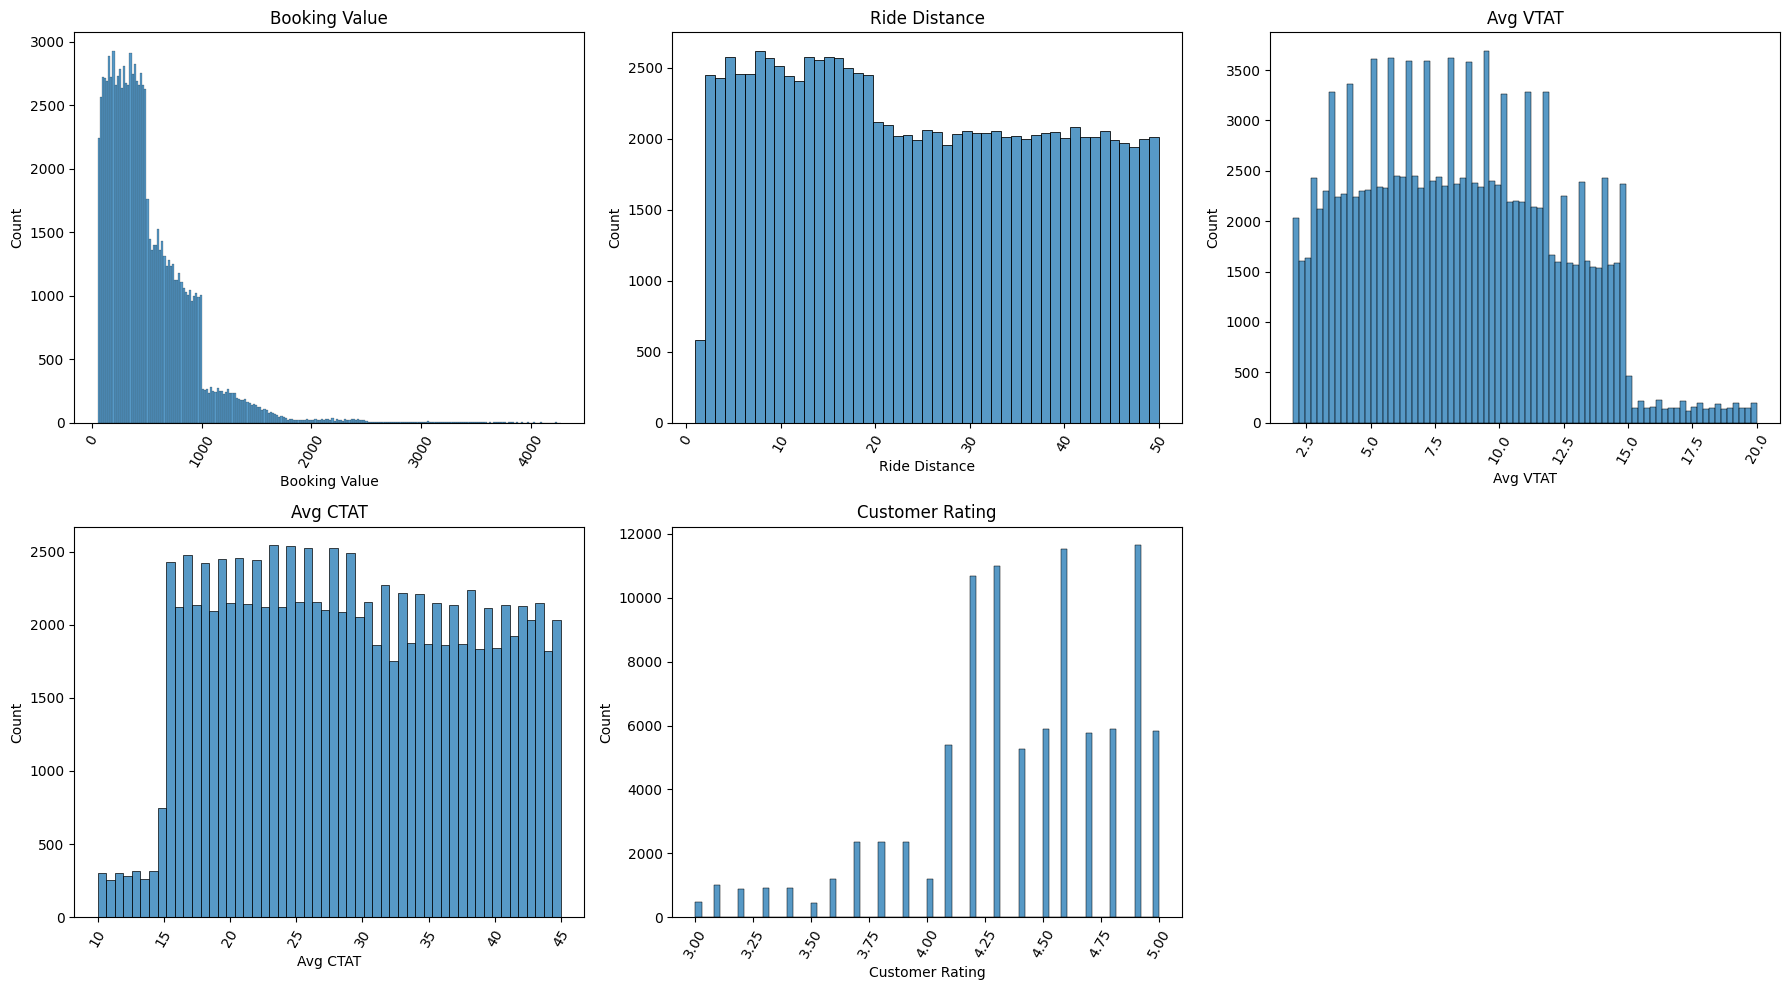

In [35]:
cols = ['Booking Value','Ride Distance',
        'Avg VTAT', 'Avg CTAT', 'Customer Rating']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))

axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=60)

# hide the unused subplot
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Insights:
---
* Booking Value
  * Strongly skewed right.
  * Most bookings are concentrated at low values ( < ₹1000)
  * Very few high-value rides beyond ₹2000
  > Suggests majority of customers take cheaper rides.
---
* Ride Distance
  * Distribution is fairly spread out up to ~50 Km
  * Many rides in the 0-20 km range but also a decent number up to ~50 km.
  > Indicates the platform supports both short city trips and longer inter-city rides.
---
* Avg VTAT
  * Peaks in the 5-10 min range.
  * Drops off sharply after ~15 min.
  > Means vehicles usually arrive quickly most within 10 minutes.
  > Long waits (>15 min) are rare.
---
* Avg CTAT (Customer Turnaround Time)
  * Concentrated around 20-40 minutes.
  * Very few customers take less than ~15 mins or more than ~45 mins.
  > Suggests typical customer engagement is ~30 mins.
---
* Customer Rating
  * Highly skewed towards the top.
  * Most ratings are 4.5 - 5.0
  * very few customers rate below 3.
  > Indicates customers are generally very satisfied.

### Box Plots

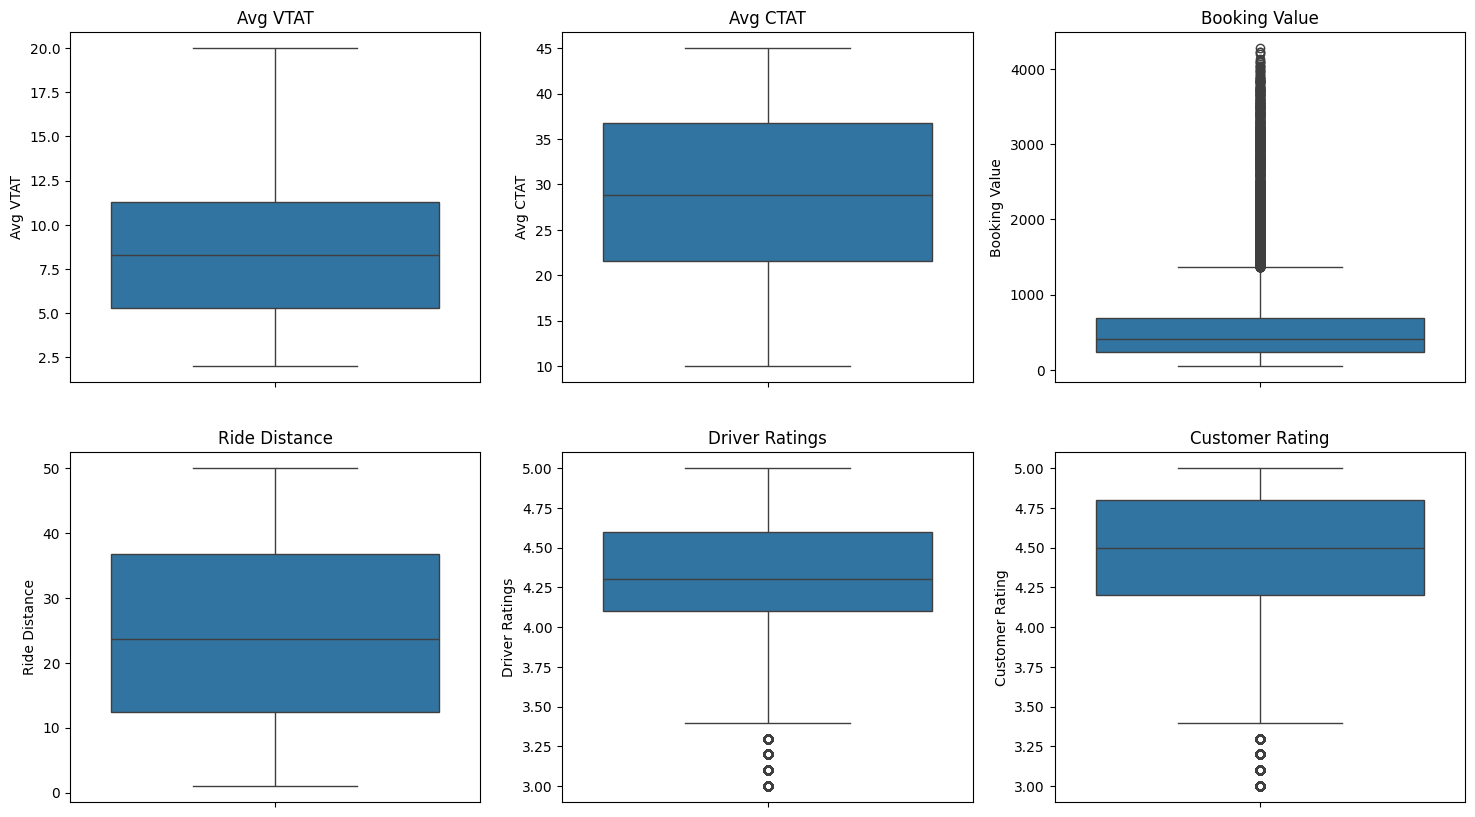

In [36]:
cols = ['Avg VTAT', 'Avg CTAT', 
        'Booking Value', 'Ride Distance', 
        'Driver Ratings', 'Customer Rating']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
axes = axes.flatten()
for i,col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x')

### Correlation between Variables

#### Heatmap

<Axes: >

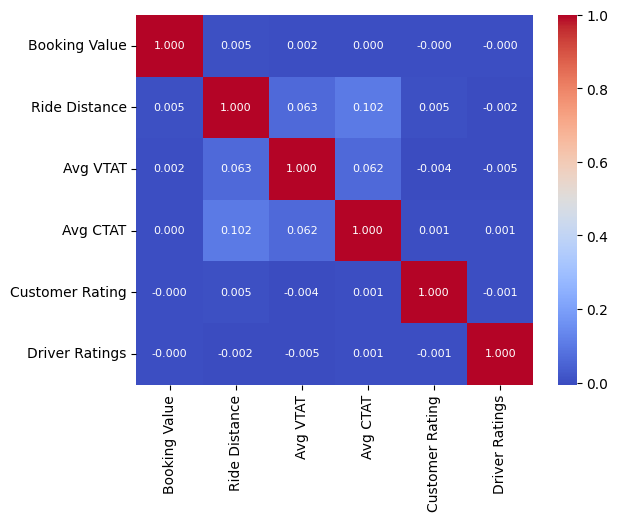

In [37]:
cols = ['Booking Value', 'Ride Distance', 
        'Avg VTAT', 'Avg CTAT', 
        'Customer Rating', 'Driver Ratings']

sns.heatmap(df[cols].corr(), 
            annot=True,
            fmt=".3f", # limit to 2 decimal places
            annot_kws={"size":8},
            cmap='coolwarm') # annot font size

#### Scatter plots

Text(0, 0.5, 'Booking Value')

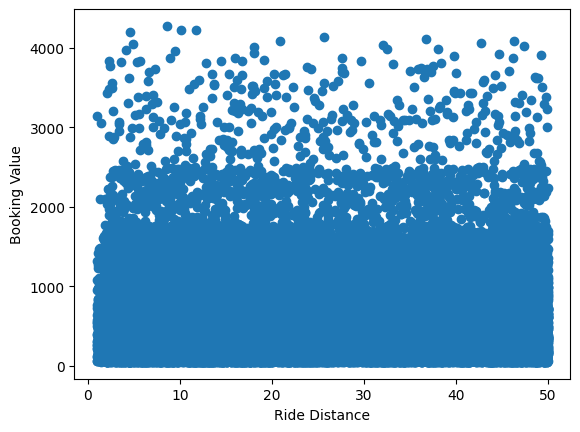

In [38]:
plt.scatter(data=df, x='Ride Distance', y='Booking Value')
plt.xlabel('Ride Distance')
plt.ylabel('Booking Value')

> Insights
  * Booking value doesnot scale cleanly with distance (maybe due to fixed base charges, offers or pricing rules)
  * Most rides fall within a band of 0 to 2000 value regardless of distance
  * Outliers may need investigation (high-value rides at small distance)

Text(0, 0.5, 'Customer Ratings')

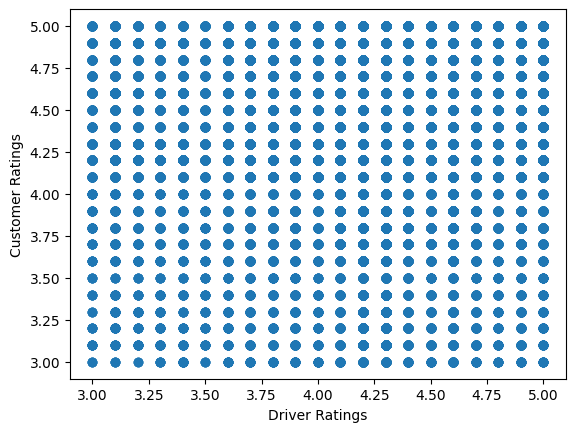

In [39]:
plt.scatter(data=df, x='Driver Ratings', y='Customer Rating')
plt.xlabel('Driver Ratings')
plt.ylabel('Customer Ratings')

In [40]:
df[['Driver Ratings', 'Customer Rating']].corr()

,Driver Ratings,Customer Rating
Driver Ratings,1.00000,-0.00101
Customer Rating,-0.00101,1.00000


> Insights
  * There is no linear relationship between Driver Ratings and Customer Ratings.

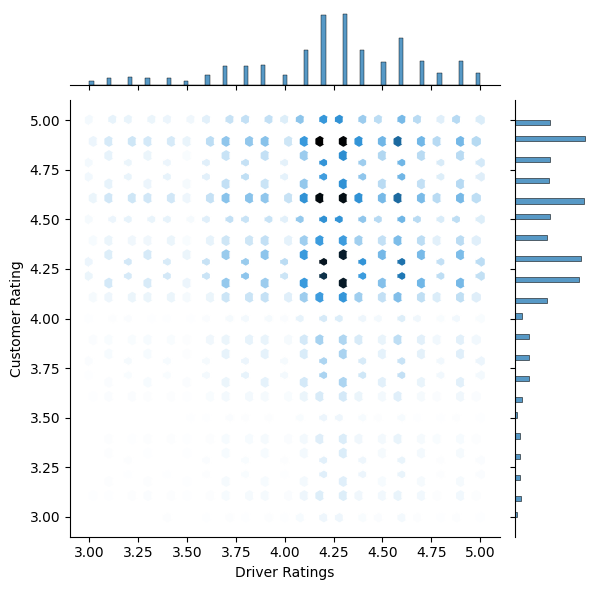

In [41]:
sns.jointplot(x='Driver Ratings', y='Customer Rating', data=df, kind='hex')

> Insights
  * Ratings cluster near the top (both drivers and customers usually give high ratings).
  * Customers seem a bit more generous (more 4.25 - 5.0) while drivers center more around 4.25.


#### Grouped Aggregations

In [42]:
df.groupby('Vehicle Type')['Booking Value'].mean().sort_values()

Vehicle Type
Uber XL          501.816749
eBike            503.897090
Auto             506.725241
Go Mini          507.684934
Premier Sedan    509.568169
Bike             510.200299
Go Sedan         511.503385
Name: Booking Value, dtype: float64

In [43]:
df.groupby('Booking Status')['Ride Distance'].mean()

Booking Status
Cancelled by Customer          NaN
Cancelled by Driver            NaN
Completed                26.000493
Incomplete               10.547706
No Driver Found                NaN
Name: Ride Distance, dtype: float64

### Location based Insights

In [44]:
location_popularity = df['Pickup Location'].value_counts().sort_values()

#### Least popular pickup locations

In [45]:
location_popularity.head(10)

Pickup Location
Ghitorni Village    790
Ashok Vihar         796
Laxmi Nagar         797
Noida Sector 18     799
Mandi House         800
Chirag Delhi        800
Bahadurgarh         802
Kalkaji             803
Dilshad Garden      804
Old Gurgaon         807
Name: count, dtype: int64

#### Most popular pickup locations

In [46]:
location_popularity.tail(10)

Pickup Location
Pataudi Chowk       907
Dwarka Sector 21    914
Mehrauli            915
AIIMS               918
Madipur             919
Pragati Maidan      920
Badarpur            921
Saket               931
Barakhamba Road     946
Khandsa             949
Name: count, dtype: int64

In [47]:
# Pickup vs Drop frequency mapping.

##### Pickup vs Drop frequency mapping

In [48]:
pd.crosstab(df['Pickup Location'], df['Drop Location'])

Drop Location,AIIMS,Adarsh Nagar,Akshardham,Ambience Mall,Anand Vihar,Anand Vihar ISBT,Ardee City,Arjangarh,Ashok Park Main,Ashok Vihar,...,Udyog Vihar Phase 4,Uttam Nagar,Vaishali,Vasant Kunj,Vatika Chowk,Vidhan Sabha,Vinobapuri,Vishwavidyalaya,Welcome,Yamuna Bank
Pickup Location,,,,,,,,,,,,,,,,,,,,,
AIIMS,0,2,3,6,3,5,5,2,12,3,...,5,3,8,5,7,6,3,3,4,7
Adarsh Nagar,9,0,3,5,3,5,5,6,7,4,...,4,2,5,2,3,3,7,2,5,6
Akshardham,3,6,0,5,3,5,4,3,1,7,...,4,7,2,6,5,1,4,5,5,4
Ambience Mall,4,9,13,0,6,3,7,2,5,8,...,2,1,6,4,5,6,6,7,5,7
Anand Vihar,10,2,1,7,0,4,7,3,4,5,...,6,6,5,9,5,5,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vidhan Sabha,8,4,4,5,5,6,3,2,6,2,...,4,2,6,4,2,0,1,5,5,4
Vinobapuri,7,4,5,4,6,3,8,7,5,4,...,6,4,3,4,3,3,0,4,0,3
Vishwavidyalaya,4,9,5,7,9,7,3,3,1,1,...,0,7,6,5,5,5,9,0,7,11


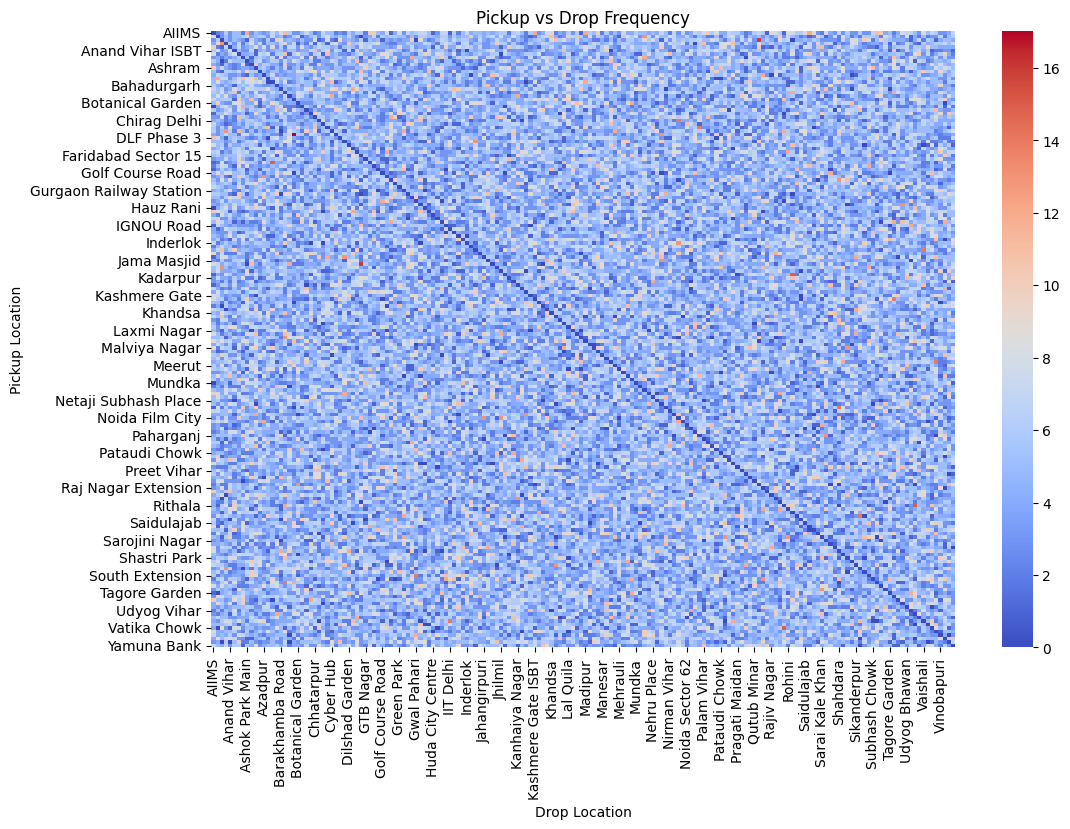

In [49]:
pickup_drop = pd.crosstab(df['Pickup Location'], df['Drop Location'])

plt.figure(figsize=(12,8))
sns.heatmap(pickup_drop, cmap="coolwarm")
plt.title("Pickup vs Drop Frequency")
plt.show()

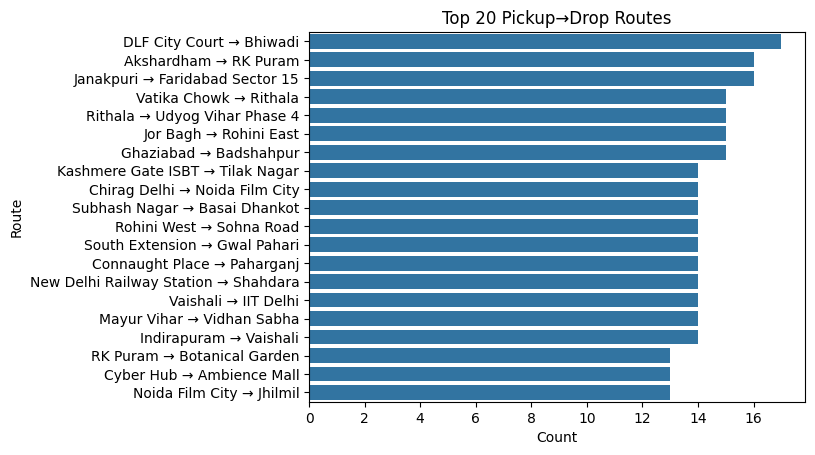

In [72]:
top_routes = df.groupby(['Pickup Location','Drop Location']).size().reset_index(name='Count')
top_routes = top_routes.sort_values('Count', ascending=False).head(20)

top_routes['Route'] = top_routes['Pickup Location'] + " → " + top_routes['Drop Location']

sns.barplot(data=top_routes, x='Count', y='Route')
plt.title("Top 20 Pickup→Drop Routes")
plt.show()


### Time-based Analysis

In [51]:
# Convert Date & Time into datetime.

# Extract hour, day, month, weekday.

# Analyze:

# Peak booking hours.

# Daily / monthly trends.

# Cancellation trends by time of day.

In [52]:
df['hours'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month_name()
df['weekday'] = df['Date'].dt.day_name()
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,hours,day,month,weekday
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12,23,March,Saturday
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,18,29,November,Friday
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,8,23,August,Friday
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,17,21,October,Monday
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,22,16,September,Monday


Peak booking Hours:

In [ ]:
# sns.countplot(data=df,x='hours')
# plt.show()

cancel_by_hour = df.groupby('hours')['Booking ID'].count()
# print(cancel_by_hour)
cancel_by_hour.plot(kind='bar', figsize=(12,6), title='Bookings per hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.show()

KeyError: 'Column not found: Booking Id'

Daily / Monthly trends

<Axes: title={'center': 'Daily Bookings'}, xlabel='Date'>

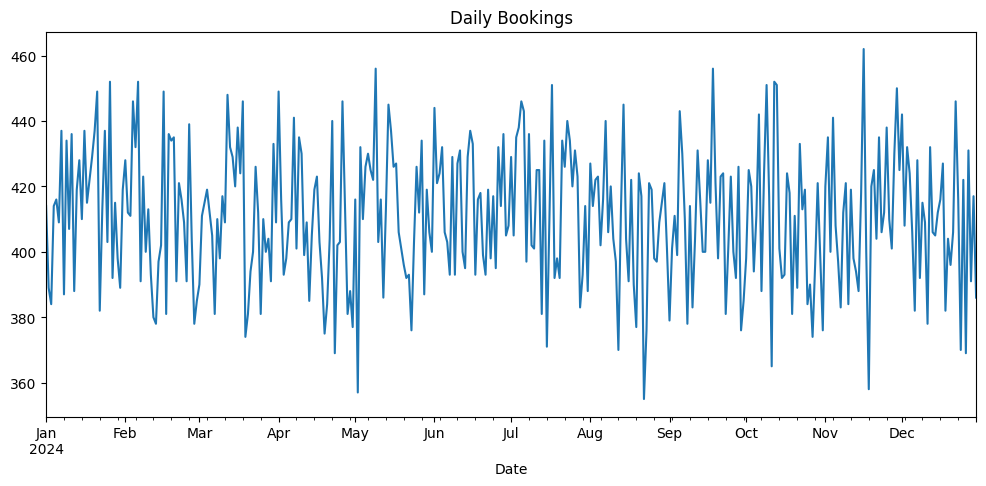

In [54]:
df.groupby('Date').size().plot(figsize=(12,5),title='Daily Bookings')

C:\Users\RUN\AppData\Local\Temp\ipykernel_14328\665548121.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').size().plot(figsize=(12,5), title='Monthly Bookings')


<Axes: title={'center': 'Monthly Bookings'}, xlabel='Date'>

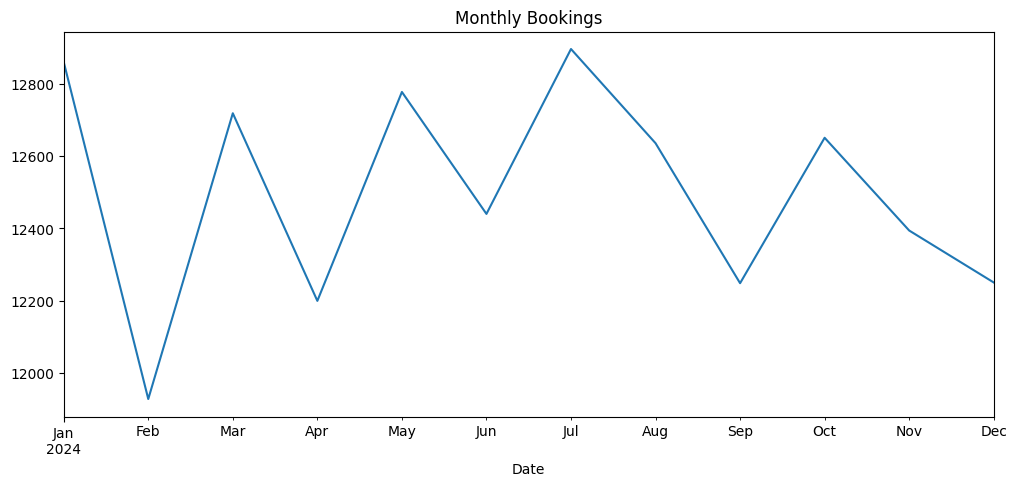

In [73]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.resample('M').size().plot(figsize=(12,5), title='Monthly Bookings')

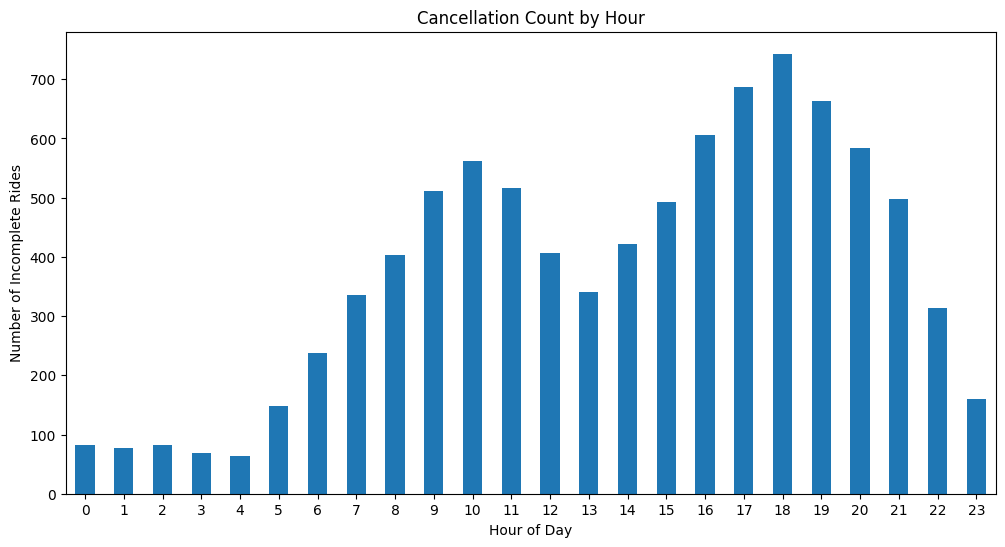

In [55]:
# Group by hour only
cancel_by_hour = df.groupby('hours')['Incomplete Rides'].count()
# print(cancel_by_hour)
cancel_by_hour.plot(kind='bar', figsize=(12,6), title='Cancellation Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incomplete Rides')
plt.xticks(rotation=0)
plt.show()


### Cancellations & Incomplete Rides

In [56]:
# % rides cancelled by driver vs customer.

# Common reasons for cancellation.

# Compare cancellation rates by Vehicle Type or Payment Method.

Driver %:  72.0
Customer %:  28.000000000000004


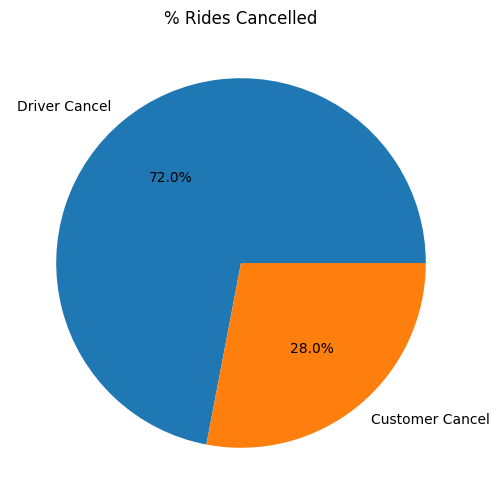

In [57]:
driver_cancel = df['Cancelled Rides by Driver'].sum()
cust_cancel = df['Cancelled Rides by Customer'].sum()

total_cancel = driver_cancel + cust_cancel

print("Driver %: ", driver_cancel / total_cancel * 100)
print("Customer %: ", cust_cancel / total_cancel * 100)

pd.Series({
    "Driver Cancel": driver_cancel,
    "Customer Cancel": cust_cancel
}).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='% Rides Cancelled')
plt.show()

<Axes: title={'center': 'Top Customer Cancellation Reasons'}, ylabel='Reason for cancelling by Customer'>

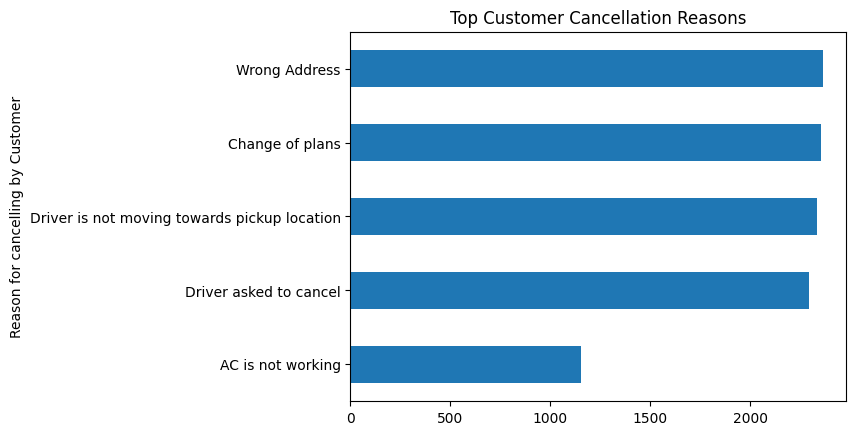

In [58]:
df['Reason for cancelling by Customer'].value_counts().sort_values().plot(kind='barh',title='Top Customer Cancellation Reasons')

<Axes: title={'center': 'Top Driver Cancellation Reason'}, ylabel='Driver Cancellation Reason'>

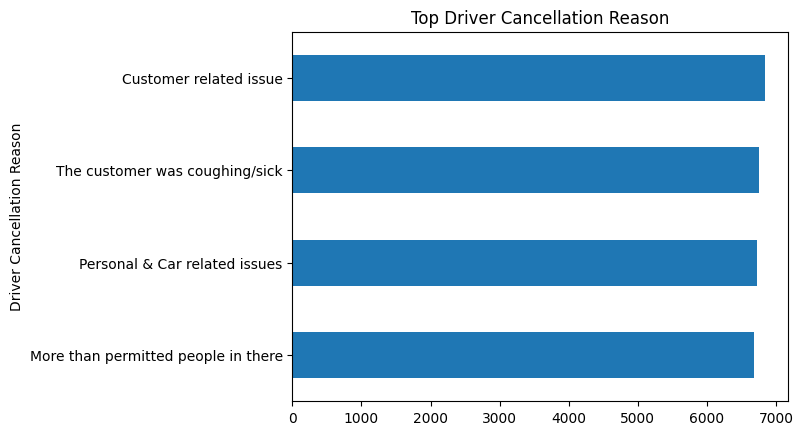

In [59]:
df['Driver Cancellation Reason'].value_counts().sort_values().plot(kind='barh', title='Top Driver Cancellation Reason')

compare cancellation rates by Vehicle Type / Payment Method

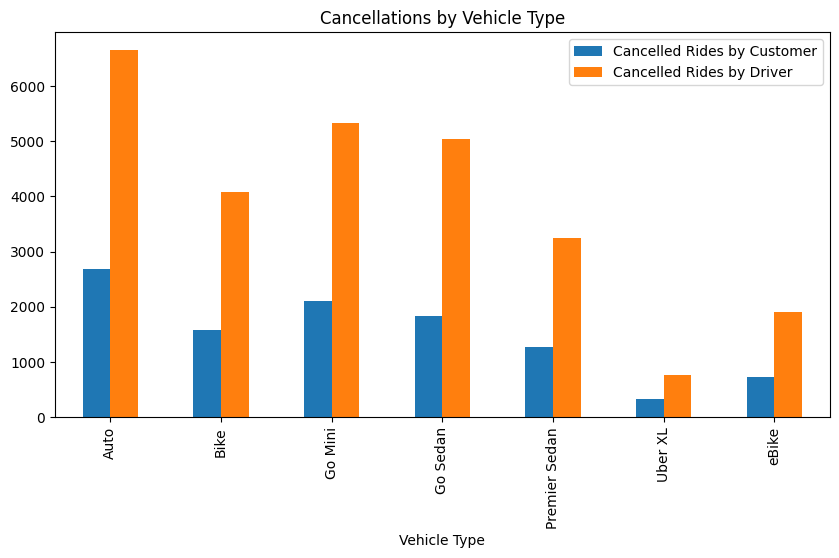

In [60]:
df.groupby('Vehicle Type')[['Cancelled Rides by Customer','Cancelled Rides by Driver']].sum().plot(
    kind='bar', figsize=(10,5), title='Cancellations by Vehicle Type'
)
plt.show()

### Ratings Analysis

In [61]:
# Distribution of Driver Ratings vs Customer Rating.

# Compare high vs low rating rides:

# Do longer rides get lower ratings?

# Do cancellations impact ratings?

<Axes: title={'center': 'Distribution of Ratings'}, ylabel='Frequency'>

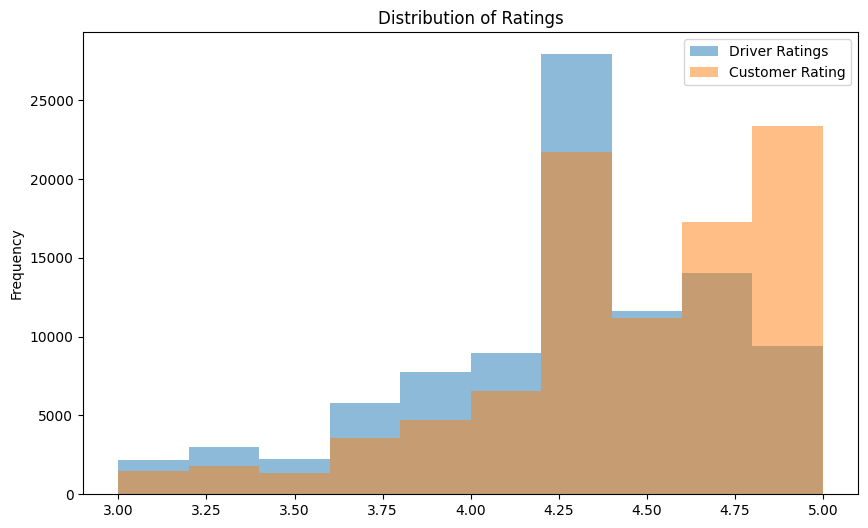

In [62]:
df[['Driver Ratings','Customer Rating']].plot(
    kind='hist', alpha=0.5, bins=10, figsize=(10,6),
    title= 'Distribution of Ratings'
)

<Axes: title={'center': 'Driver vs Customer Ratings'}, ylabel='Density'>

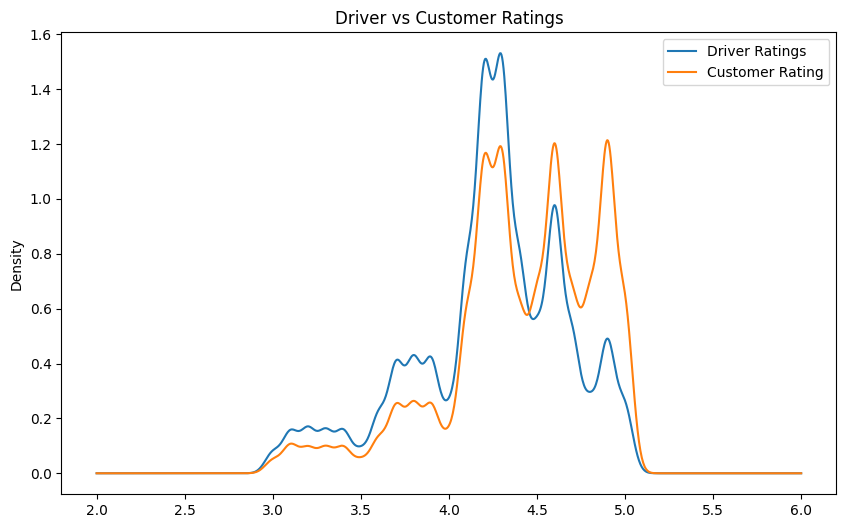

In [63]:
df[['Driver Ratings','Customer Rating']].plot(
    kind='kde', figsize=(10,6), title='Driver vs Customer Ratings'
)

compare high vs low rating rides

In [64]:
df['High Rating'] = df['Customer Rating'] >= 4

df.groupby('High Rating').agg({
    'Ride Distance':'mean',
    'Booking Value':'mean',
    'Cancelled Rides by Customer':'sum',
    'Cancelled Rides by Driver':'sum'
})

,Ride Distance,Booking Value,Cancelled Rides by Customer,Cancelled Rides by Driver
High Rating,,,,
False,19.500666,507.457791,10500.0,27000.0
True,26.041576,508.525101,0.0,0.0


do longer rides get lower ratings?

Correlation: 0.004514477218554272


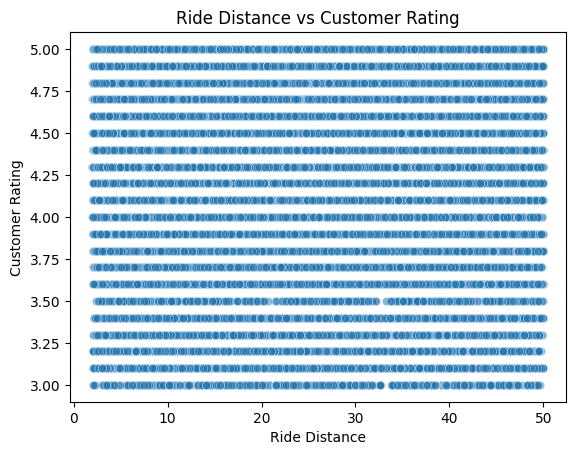

In [65]:
sns.scatterplot(data=df, x='Ride Distance', y='Customer Rating', alpha=0.5)
plt.title('Ride Distance vs Customer Rating')

print("Correlation:", df['Ride Distance'].corr(df['Customer Rating']))

customer cancellation behaviour vs ratings

In [66]:
cust_cancel = df.groupby('Customer ID')['Cancelled Rides by Customer'].sum()

df = df.merge(cust_cancel.rename('Customer Total Cancels'), on='Customer ID', how='left')

df.groupby('Customer Total Cancels')['Driver Ratings'].mean()

Customer Total Cancels
0.0    4.231041
1.0    4.188785
2.0         NaN
Name: Driver Ratings, dtype: float64

### Payment Method Insights

In [67]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method', 'hours', 'day',
       'month', 'weekday', 'High Rating', 'Customer Total Cancels'],
      dtype='object')

<Axes: xlabel='Payment Method', ylabel='count'>

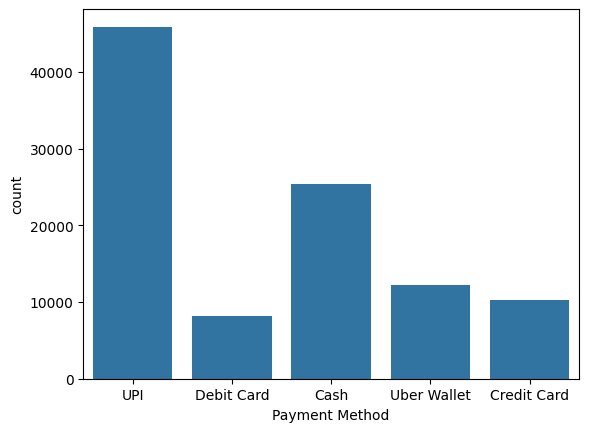

In [68]:
sns.countplot(data=df, x='Payment Method')

In [69]:
df.groupby('Payment Method')['Booking Value'].mean().reset_index()

,Payment Method,Booking Value
0,Cash,508.363188
1,Credit Card,511.707807
2,Debit Card,507.405025
3,UPI,508.508157
4,Uber Wallet,505.123656


In [70]:
# Distribution of payment methods.

# Avg Booking Value by Payment Method.

# Cancellation rate by payment method. : Payment only after completion